In [23]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, message='.*force_all_finite.*')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
basedf = pd.read_excel('stockout_data.xlsx', sheet_name='default_1')

In [25]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(basedf):
    # Filter rows based on column: 'Warehouse Sub Location'
    basedf = basedf[basedf['Warehouse Sub Location'].str.contains("Critical", regex=False, na=False, case=False)]
    return basedf

basedf_critical = clean_data(basedf.copy())
basedf_critical.head()

,Month,Warehouse Location,Warehouse Sub Location,Stockouts,Year,Month (number),Month (name)
0,2021-03-01,All,Critical Items,230,2021,3,March
2,2021-04-01,All,Critical Items,220,2021,4,April
4,2021-05-01,All,Critical Items,240,2021,5,May
7,2021-06-01,All,Critical Items,235,2021,6,June
10,2021-07-01,All,Critical Items,162,2021,7,July


In [26]:
# create a date range 
date_range = pd.date_range(start='2021-03-01', end='2022-12-31', freq='MS')

In [27]:
date_range

DatetimeIndex(['2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01', '2021-09-01', '2021-10-01',
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [28]:
# convert the date_range to a dataframe
date_range_df = pd.DataFrame(date_range, columns=['Month'])
date_range_df.set_index('Month', inplace=True)


In [29]:
# Filter rows based on column: 'Warehouse Location'
basedf_critical_all = basedf_critical[basedf_critical['Warehouse Location'] == "All"].copy()

In [30]:
# set the Month as index for base_critical_all
basedf_critical_all['Month'] = pd.to_datetime(basedf_critical_all['Month'])
basedf_critical_all = basedf_critical_all.set_index('Month')

In [31]:
# join the basedf_critical_all dataframe with date_range_df and ensure that all rows from date_range_df are included
basedf_critical_all = basedf_critical_all.reindex(date_range)

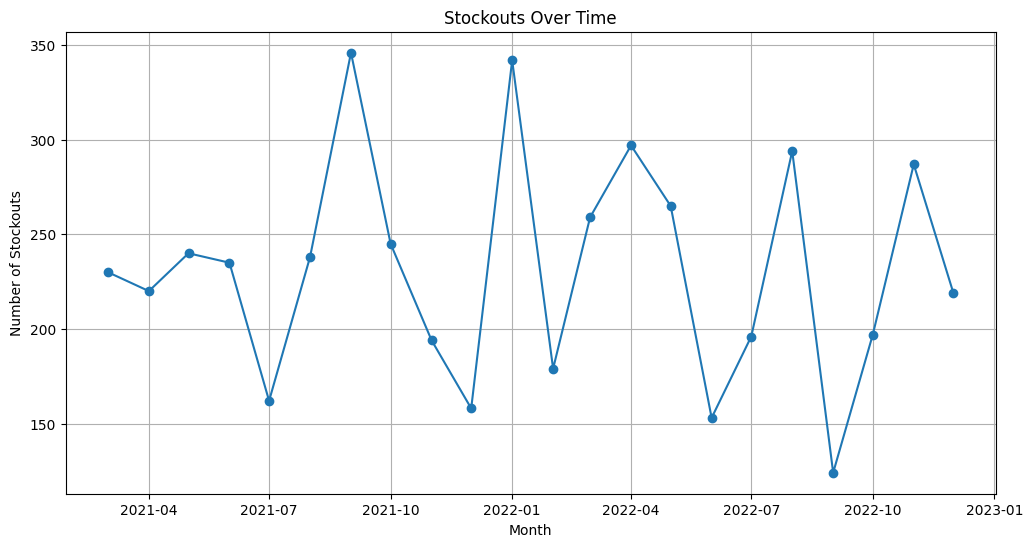

In [32]:
# Create a line plot for Stockouts over time
plt.figure(figsize=(12, 6))
plt.plot(basedf_critical_all.index, basedf_critical_all['Stockouts'], marker='o')
plt.title('Stockouts Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Stockouts')
plt.grid()
plt.show()

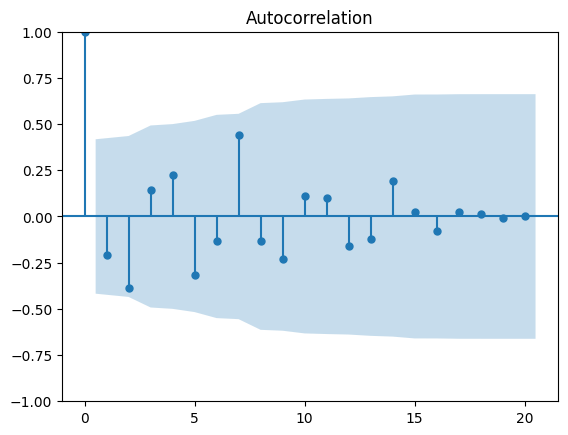

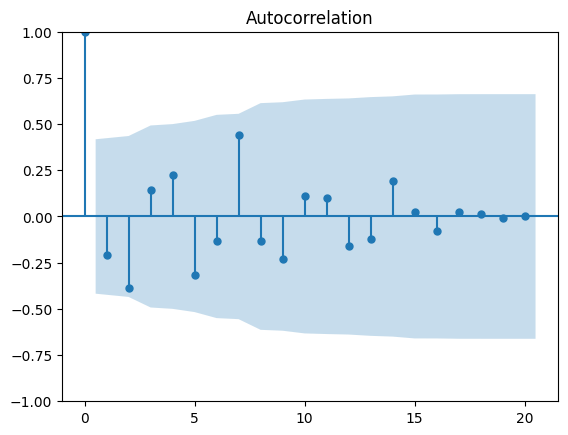

In [33]:
# Create an ACF Plot using the 'Stockouts' column in the basedf_critical_all dataframe
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(basedf_critical_all['Stockouts'], lags=20)

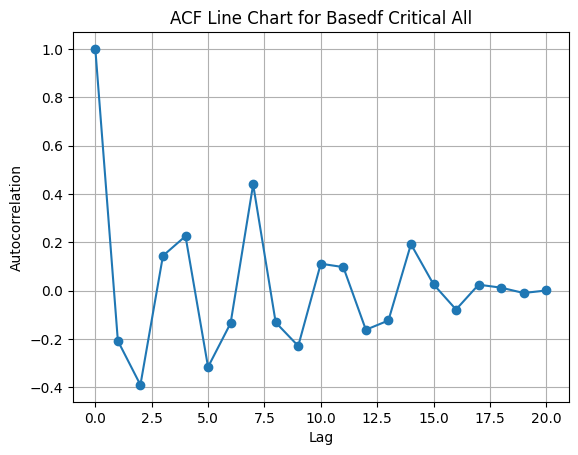

In [34]:
# Create the ACF plot for basedf_critical_all dataframe using statsmodels function using a line chart to check seasonality periods
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate ACF values
acf_values = sm.tsa.acf(basedf_critical_all['Stockouts'].dropna(), nlags=20)

# Plot as a line chart
plt.plot(range(len(acf_values)), acf_values, marker='o', linestyle='-')
plt.title('ACF Line Chart for Basedf Critical All')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# the plot shows that there is no seasonality in the data


In [35]:
# using pndarima library and ndiffs function, identify the 'd' component of the basedf_critical_all dataframe

import pmdarima as pm

# Drop NaN values to avoid warnings
stockouts_clean = basedf_critical_all['Stockouts'].dropna()

d1 = pm.arima.ndiffs(stockouts_clean, alpha=0.05, test='adf', max_d=3)
print(f"The 'd' component of the basedf_critical_all dataframe is: {d1}")
d2 = pm.arima.ndiffs(stockouts_clean, alpha=0.05, test='kpss', max_d=3)
print(f"The 'd' component of the basedf_critical_all dataframe is: {d2}")


The 'd' component of the basedf_critical_all dataframe is: 1
The 'd' component of the basedf_critical_all dataframe is: 0


In [36]:
# apply the differencing of 1 to the basedf_critical_all dataframe
basedf_critical_all['Stockouts_diff'] = basedf_critical_all['Stockouts'].diff(periods=1)

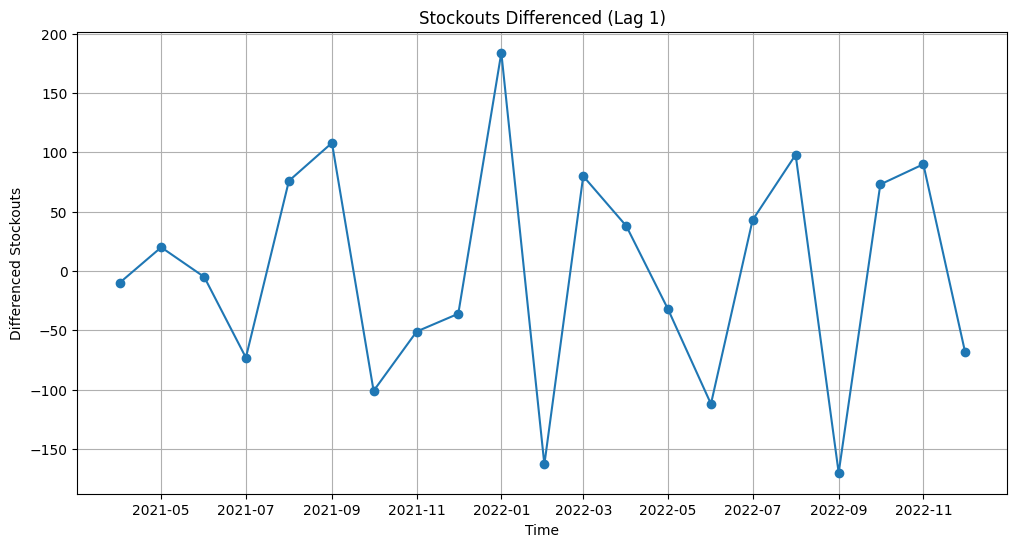

In [37]:
# plot a line chart for Stockouts_diff
plt.figure(figsize=(12, 6))
plt.plot(basedf_critical_all['Stockouts_diff'], marker='o', linestyle='-')
plt.title('Stockouts Differenced (Lag 1)')
plt.xlabel('Time')
plt.ylabel('Differenced Stockouts')
plt.grid(True)
plt.show()


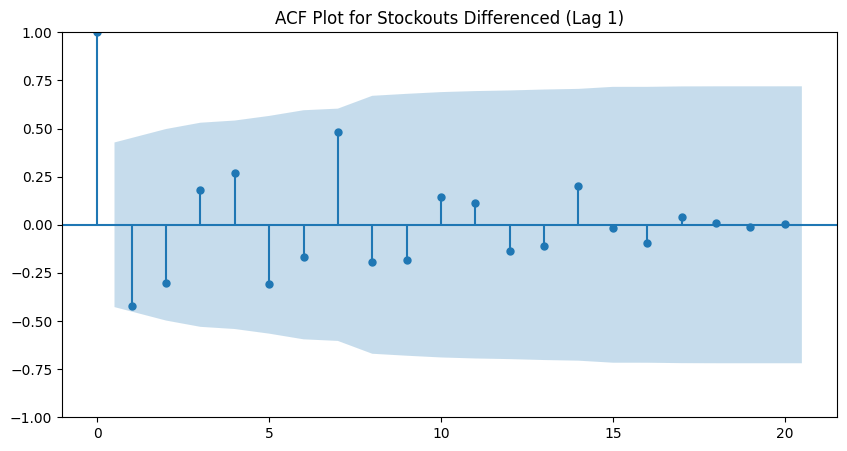

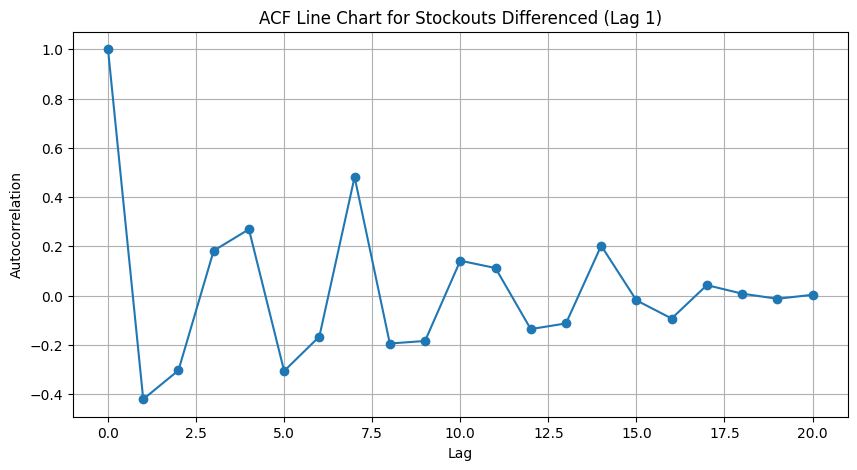

In [38]:
# plot the acf data for stockouts_diff
acf_values = sm.tsa.acf(basedf_critical_all['Stockouts_diff'].dropna(), nlags=20)

# Plot using plot_acf functions in statsmodels
plt.figure(figsize=(10, 5))
sm.graphics.tsa.plot_acf(basedf_critical_all['Stockouts_diff'].dropna(), lags=20, alpha=0.05, ax=plt.gca())
plt.title('ACF Plot for Stockouts Differenced (Lag 1)')
plt.show()

#Plot a line chart for Stockouts_diff ACF values
plt.figure(figsize=(10, 5))
plt.plot(range(len(acf_values)), acf_values, marker='o', linestyle='-')
plt.title('ACF Line Chart for Stockouts Differenced (Lag 1)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

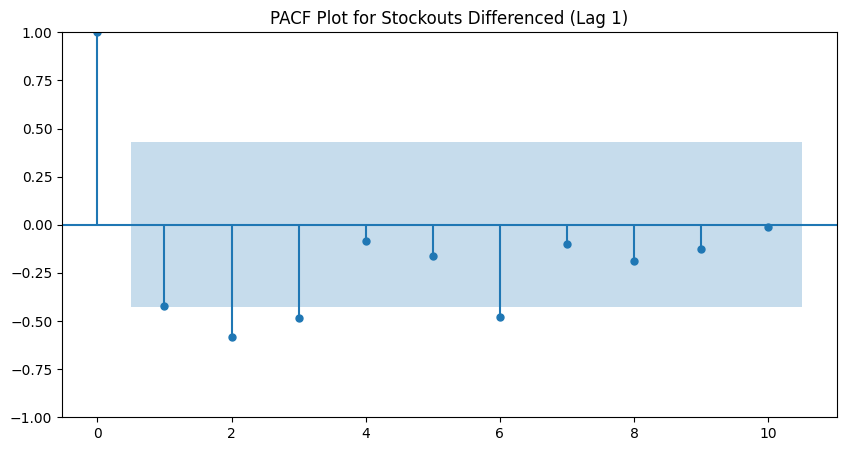

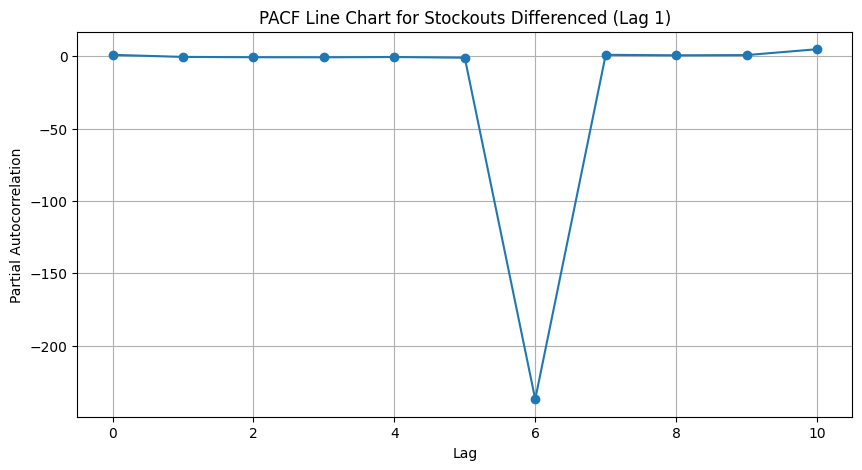

In [39]:
# plot the pacf plots for stockouts_diff
pacf_values = sm.tsa.pacf(basedf_critical_all['Stockouts_diff'].dropna(), nlags=10)

# Plot using plot_pacf functions in statsmodels
plt.figure(figsize=(10, 5))
sm.graphics.tsa.plot_pacf(basedf_critical_all['Stockouts_diff'].dropna(), lags=10, alpha=0.05, ax=plt.gca())
plt.title('PACF Plot for Stockouts Differenced (Lag 1)')
plt.show()

#Plot a line chart for Stockouts_diff PACF values
plt.figure(figsize=(10, 5))
plt.plot(range(len(pacf_values)), pacf_values, marker='o', linestyle='-')
plt.title('PACF Line Chart for Stockouts Differenced (Lag 1)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()